In [ ]:
pip install scikit-image

# Richardson-Lucy algorithm

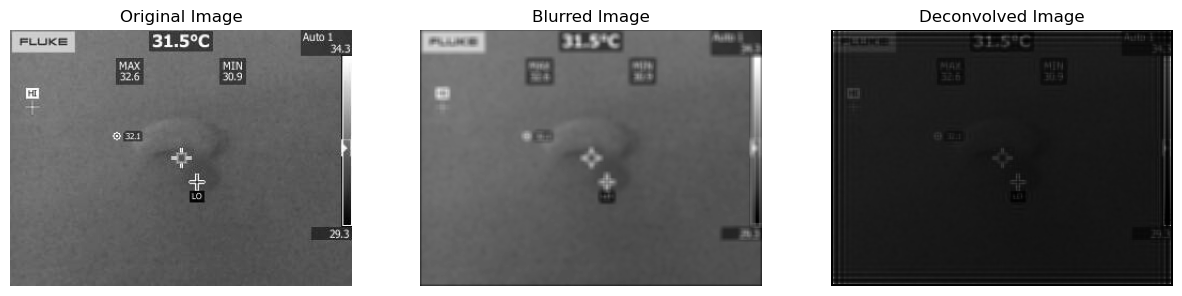

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.signal import convolve

def richardson_lucy(image, psf, num_iterations=50):
    """
    Perform Richardson-Lucy deconvolution on a blurred image.
    """
    estimate = np.copy(image)
    psf_mirror = np.flip(psf)

    for _ in range(num_iterations):
        estimate_convolved = convolve(estimate, psf, mode='same')
        relative_blur = image / (estimate_convolved + 1e-12) 
        error_estimation = convolve(relative_blur, psf_mirror, mode='same')
        estimate *= error_estimation
    
    return estimate

psf_size = 5
psf = np.zeros((psf_size, psf_size))
psf[psf_size//2, psf_size//2] = 1
psf = convolve(psf, np.ones((5, 5)) / 25, mode='same')


image_path = './Images/IR_00002.JPG'
image = Image.open(image_path).convert('L') 
original = np.array(image)

blurred = convolve(original, psf, mode='same')

deconvolved = richardson_lucy(blurred, psf, num_iterations=50)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(original, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(blurred, cmap='gray')
axes[1].set_title('Blurred Image')
axes[1].axis('off')

axes[2].imshow(deconvolved, cmap='gray')
axes[2].set_title('Deconvolved Image')
axes[2].axis('off')

plt.show()


## Applying CLAHE (adaptive histogram equalization) to increase the contrast of the image

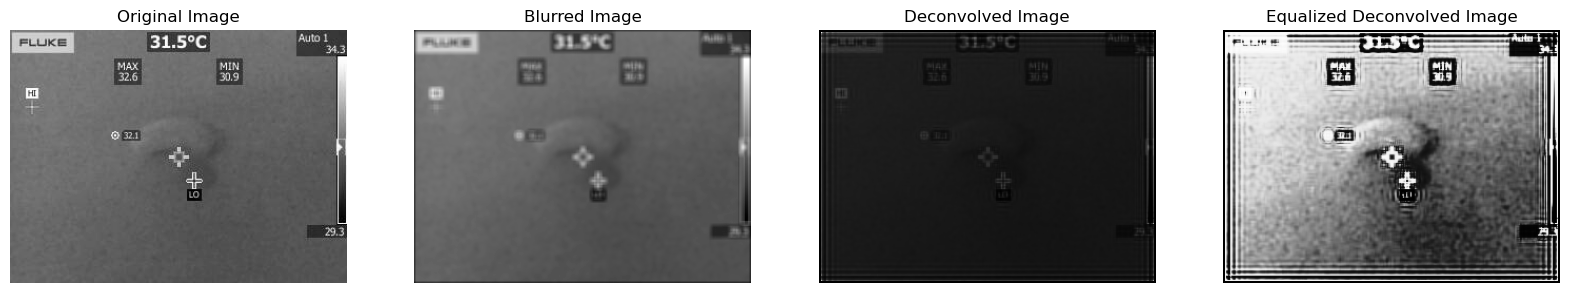

In [3]:
import numpy as np
from scipy.signal import convolve
from skimage import exposure
import matplotlib.pyplot as plt
from PIL import Image
from skimage.io import imsave


output_directory = './Outputs/'  # Adjust this path as needed
output_filename = 'equalized_deconvolved_image.jpg'
output_path = output_directory + output_filename

def richardson_lucy(image, psf, num_iterations=50):
    estimate = np.copy(image)
    psf_mirror = np.flip(psf)
    psf /= psf.sum()  # Ensure PSF is normalized

    for _ in range(num_iterations):
        estimate_convolved = convolve(estimate, psf, mode='same')
        relative_blur = image / (estimate_convolved + 1e-12) 
        error_estimation = convolve(relative_blur, psf_mirror, mode='same')
        estimate *= error_estimation
    
    return estimate

image_path = './Images/IR_00002.jpg' 
image = Image.open(image_path).convert('L')
original = np.array(image)


psf_size = 5
psf = np.ones((psf_size, psf_size)) / psf_size**2


blurred = convolve(original, psf, mode='same')


deconvolved = richardson_lucy(blurred, psf, num_iterations=50)


deconvolved_eq = exposure.equalize_hist(deconvolved)
deconvolved_eq_8bit = (deconvolved_eq * 255).astype(np.uint8)
imsave(output_path,deconvolved_eq_8bit)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(original, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(blurred, cmap='gray')
axes[1].set_title('Blurred Image')
axes[1].axis('off')

axes[2].imshow(deconvolved, cmap='gray')
axes[2].set_title('Deconvolved Image')
axes[2].axis('off')

axes[3].imshow(deconvolved_eq, cmap='gray')
axes[3].set_title('Equalized Deconvolved Image')
axes[3].axis('off')

plt.show()
